In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('bank_data.csv')

In [3]:
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
data.isna().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [5]:
data.shape

(1882, 6)

In [6]:
data.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

exploratory data analysis

In [14]:
age = data['age']
expected_recovery_amount = data['expected_recovery_amount']
sex= data['sex']

In [8]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

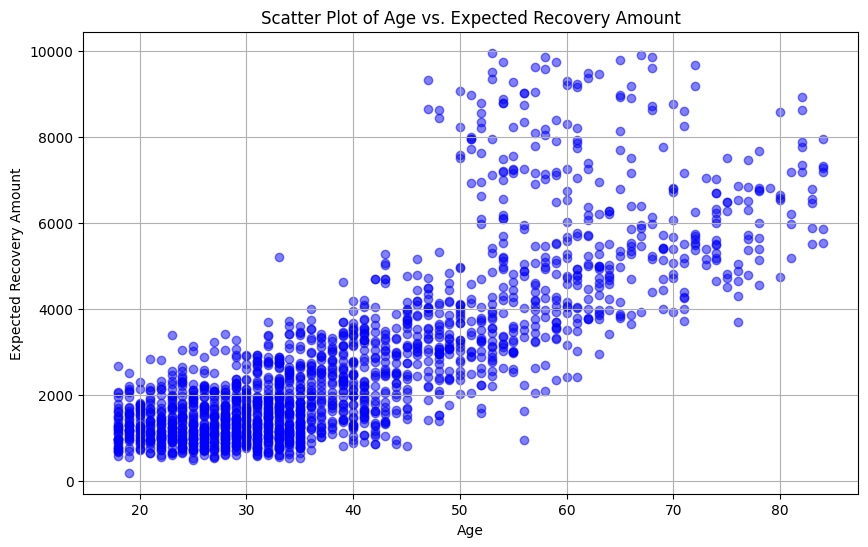

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(age, expected_recovery_amount, c='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs. Expected Recovery Amount')
plt.xlabel('Age')
plt.ylabel('Expected Recovery Amount')
plt.grid(True)
plt.show()

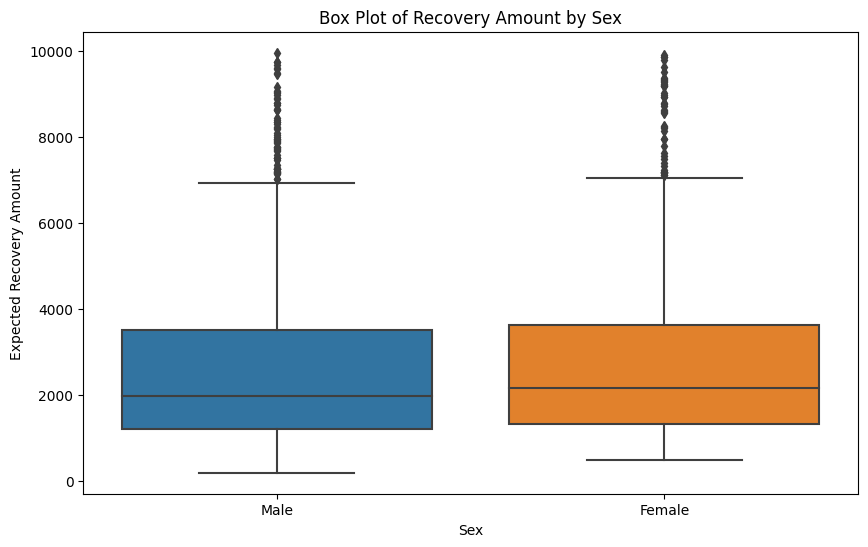

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=sex, y=expected_recovery_amount)
plt.title('Box Plot of Recovery Amount by Sex')
plt.xlabel('Sex')
plt.ylabel('Expected Recovery Amount')
plt.show()

Statistical test


age versus expected recovery amount


In [10]:
import scipy.stats as stats

In [11]:
correlation, p_value = stats.pearsonr(age, expected_recovery_amount)

# Print the results
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is a significant correlation between Age and Expected Recovery Amount.")
else:
    print("There is no significant correlation between Age and Expected Recovery Amount.")

Pearson Correlation Coefficient: 0.7944512396066289
P-value: 0.0
There is a significant correlation between Age and Expected Recovery Amount.


In [16]:
x = (900, 1100)
y = (950, 1050)
stats.kruskal(x, y)

KruskalResult(statistic=0.0, pvalue=1.0)

In [17]:
Kruskal = stats.kruskal(data.actual_recovery_amount.loc[(data['expected_recovery_amount']>900) & (data['expected_recovery_amount']<1100) ],data.actual_recovery_amount.loc[(data['expected_recovery_amount']>950) & (data['expected_recovery_amount']<1050) ])


In [20]:
Kruskal

KruskalResult(statistic=1.2480508142652285, pvalue=0.26392508797305225)

Regression modeling with no threshold

```
# This is formatted as code
```



In [27]:

import statsmodels.api

# Extracting the relevant columns
x = data['expected_recovery_amount']
y = data['actual_recovery_amount']

# Adding a constant term to the predictor variable
x_with_const = sm.add_constant(x)

# Fitting a linear regression model (without a threshold)
model = sm.OLS(y, x_with_const)
results = model.fit()

# Displaying the regression summary
print(results.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                            04:55:45   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Regression modeling with adding true threshold

In [30]:
data['Threshold'] = (data['expected_recovery_amount'] >= 1000).astype(int)


x = data[['expected_recovery_amount', 'Threshold']]
y = data['actual_recovery_amount']

x_with_const = sm.add_constant(x)


model = sm.OLS(y, x_with_const)
results = model.fit()

print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4241.
Date:                    Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                            05:01:05   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Regression modeling with adjusting the window

In [31]:
data['Threshold'] = (data['expected_recovery_amount'] >= 950 ).astype(int)
x = data[['expected_recovery_amount', 'Threshold']]
y = data['actual_recovery_amount']

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.818
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4237.
Date:                    Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                            05:04:20   Log-Likelihood:                -16927.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.388e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------